In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import pickle
%matplotlib inline

In [2]:
with open("../saved-experiments/width_depth_experiment_logs.pkl", "rb") as handle:
    dump = pickle.load(handle)

In [3]:
eff_dim = dump['eff_dim']
losses = dump['losses']
pars = dump['parameters']

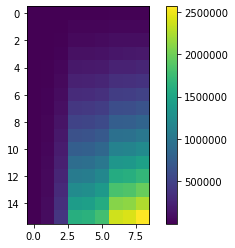

In [4]:
plt.imshow(pars)
plt.colorbar()

In [5]:
par_counts = np.zeros_like(pars)

In [6]:
np.where(pars < 1500)

(array([0, 0, 1]), array([0, 1, 0]))

Text(0, 0.5, 'Width')

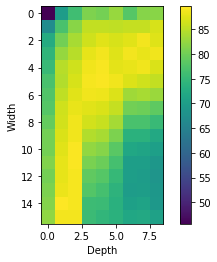

In [7]:
plt.imshow(eff_dim)
plt.colorbar()
plt.xlabel('Depth')
plt.ylabel('Width')

In [8]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))

revcolors = np.copy(newcolors)
revcolors = revcolors[::-1, :]
alphacolors = np.copy(newcolors)
alphacolors[:, -1] = np.linspace(0.25, 0.75, 256)

newcmp = ListedColormap(revcolors, name='OrangeBlue')
revcmp = ListedColormap(newcolors, name='BlueOrange')
alphacmp = ListedColormap(alphacolors, name='OrangeBlueAlpha')

In [9]:
from scipy.interpolate import interp1d
x = np.array([2.0, 2.5, 3.0, 3.4, 4.3, 5.0,  6.0,  8.0, 10])
y = np.array([20,  8.0, 6.0, 5.5, 4.9, 4.6,  4.2,  3.5, 3.0])
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(2.0, 10, 100)
ynew = f2(xnew)

In [10]:
def plot_cutoff_curve(ax):
    ax.contour(losses[0, width_cut:, depth_cut:], levels=[0.2],
              linewidths=2., colors='maroon')
#     ax.plot(xnew, ynew, linewidth=2., color="orangered")
#     ax.scatter(x, y, color="gold")

In [11]:
def plot_par_contours(ax):
    ax.contour(pars, levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
               linewidths=4., linestyles='--')


[Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '28'),
 Text(0, 0, '32'),
 Text(0, 0, '36')]

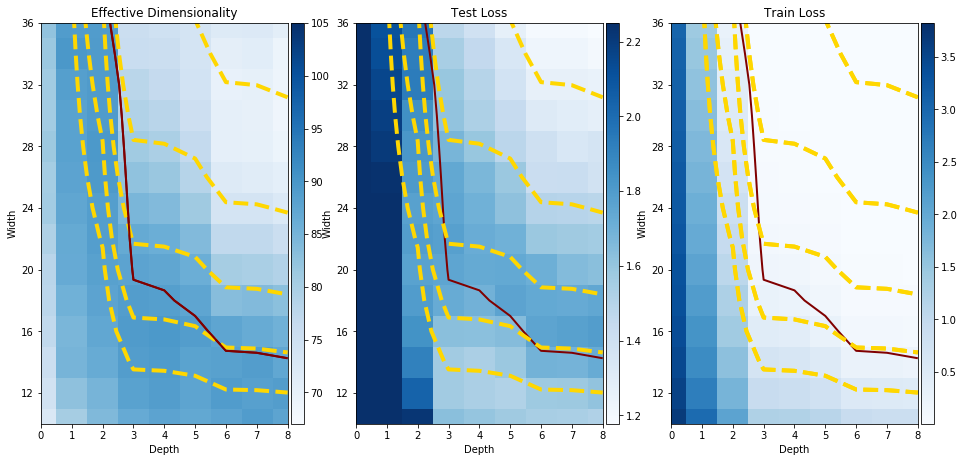

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10))

width_cut = 1
depth_cut = 0
colormap = "Blues"

p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:], cmap=colormap, vmax=105)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p1, cax=cax)
plot_cutoff_curve(ax1)
ax1.set_xlim(depth_cut, 8-depth_cut)
ax1.set_ylim(width_cut, 15-width_cut)
ax1.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])


ax1.set_xlabel('Depth')
ax1.set_ylabel('Width')
ax1.set_title('Effective Dimensionality')

## test loss ##
p2 = ax2.imshow(losses[2,width_cut:, depth_cut:], cmap=colormap, vmax=2.25)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p2, cax=cax2)

ax2.set_xlabel('Depth')
ax2.set_ylabel('Width')
ax2.set_title('Test Loss')
ax2.set_xlim(depth_cut, 8-depth_cut)
ax2.set_ylim(width_cut, 15-width_cut)
ax2.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])

## train loss ##
p3 = ax3.imshow(losses[0,width_cut:, depth_cut:], cmap=colormap)
ax3.contour(pars, levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
           linewidths=4., linestyles='--')

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(p3, cax=cax3)
plot_cutoff_curve(ax3)
plot_par_contours(ax3)

ax3.set_xlabel('Depth')
ax3.set_ylabel('Width')
ax3.set_title('Train Loss')
ax3.set_xlim(depth_cut, 8-depth_cut)
ax3.set_ylim(width_cut, 15-width_cut)
ax3.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax3.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])

(3, 12)

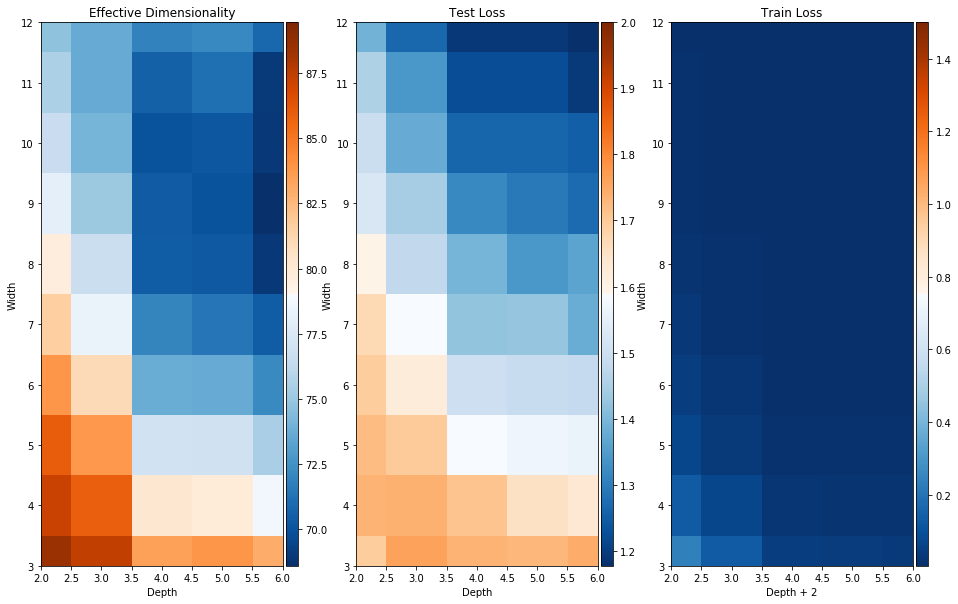

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10))

width_cut = 3
depth_cut = 2
p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:], cmap=newcmp)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p1, cax=cax)
# plot_cutoff_curve(ax1)
ax1.set_xlim(depth_cut, 8-depth_cut)
ax1.set_ylim(width_cut, 15-width_cut)


ax1.set_xlabel('Depth')
ax1.set_ylabel('Width')
ax1.set_title('Effective Dimensionality')

## test loss ##
p2 = ax2.imshow(losses[2,width_cut:, depth_cut:], cmap=newcmp,
               vmax=2.0)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p2, cax=cax2)

ax2.set_xlabel('Depth')
ax2.set_ylabel('Width')
ax2.set_title('Test Loss')
# plot_cutoff_curve(ax2)
ax2.set_xlim(depth_cut, 8-depth_cut)
ax2.set_ylim(width_cut, 15-width_cut)

## train loss ##
p3 = ax3.imshow(losses[0,width_cut:, depth_cut:], cmap=newcmp,vmax=1.5)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(p3, cax=cax3)

ax3.set_xlabel('Depth + 2')
ax3.set_ylabel('Width')
ax3.set_title('Train Loss')
# plot_cutoff_curve(ax3)
ax3.set_xlim(depth_cut, 8-depth_cut)
ax3.set_ylim(width_cut, 15-width_cut)

In [14]:
losses.shape

(4, 16, 9)

In [ ]:
model_cfg = getattr(nets, "ConvNet")

pars_im = np.zeros((16, 9))

for i, widths in enumerate(range(4, 68, 4)):
    for j, depths in enumerate(range(9)):
        # we're using cifar100
        model = model_cfg.base(*model_cfg.args, num_classes=100, **model_cfg.kwargs,
                               c=widths, max_depth=depths)
        pars = sum(m.numel() for m in model.parameters())
        pars_im[i,j] = pars

In [ ]:
plt.imshow(pars_im)
plt.colorbar()

[Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '28'),
 Text(0, 0, '32'),
 Text(0, 0, '36')]

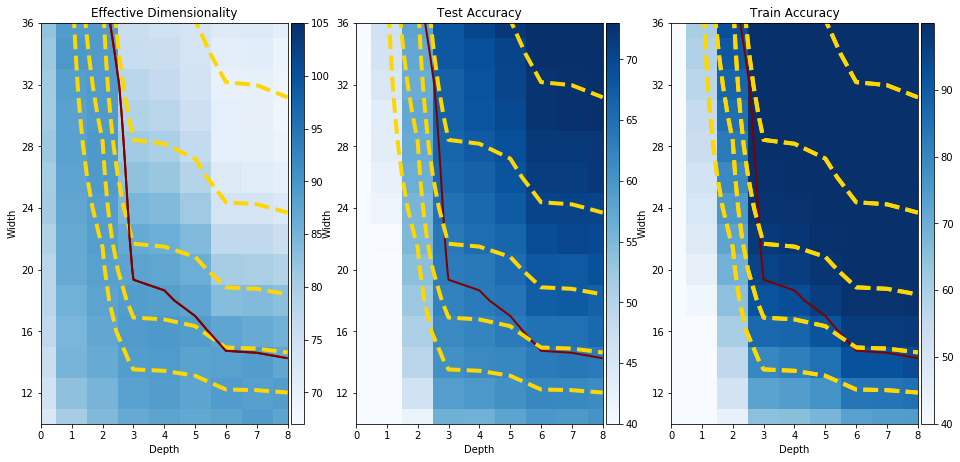

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10))

width_cut = 1
depth_cut = 0
colormap = "Blues"

p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:], cmap=colormap, vmax=105)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p1, cax=cax)
plot_cutoff_curve(ax1)
ax1.set_xlim(depth_cut, 8-depth_cut)
ax1.set_ylim(width_cut, 15-width_cut)
ax1.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])


ax1.set_xlabel('Depth')
ax1.set_ylabel('Width')
ax1.set_title('Effective Dimensionality')

## test loss ##
p2 = ax2.imshow(losses[3,width_cut:, depth_cut:], cmap=colormap, vmax=73, vmin=40)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p2, cax=cax2)

ax2.set_xlabel('Depth')
ax2.set_ylabel('Width')
ax2.set_title('Test Accuracy')
ax2.set_xlim(depth_cut, 8-depth_cut)
ax2.set_ylim(width_cut, 15-width_cut)
ax2.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])

## train loss ##
p3 = ax3.imshow(losses[1,width_cut:, depth_cut:], cmap=colormap, vmin=40)
ax3.contour(pars, levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
           linewidths=4., linestyles='--')

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(p3, cax=cax3)
plot_cutoff_curve(ax3)
plot_par_contours(ax3)

ax3.set_xlabel('Depth')
ax3.set_ylabel('Width')
ax3.set_title('Train Accuracy')
ax3.set_xlim(depth_cut, 8-depth_cut)
ax3.set_ylim(width_cut, 15-width_cut)
ax3.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax3.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])

In [17]:
losses[3]

array([[ 3.92, 12.62, 23.55, 36.82, 37.88, 37.81, 40.67, 42.55, 42.52],
       [11.66, 20.14, 35.45, 51.23, 51.54, 52.68, 55.54, 54.26, 55.53],
       [14.31, 24.98, 42.03, 56.13, 56.07, 57.92, 59.73, 59.49, 60.23],
       [16.23, 30.3 , 46.2 , 58.77, 59.64, 60.65, 61.85, 61.73, 61.36],
       [17.97, 34.02, 49.4 , 60.69, 61.59, 61.95, 63.41, 63.78, 63.35],
       [18.81, 34.6 , 50.78, 61.6 , 62.21, 63.42, 64.72, 64.86, 65.82],
       [20.02, 37.03, 52.56, 62.51, 63.58, 64.26, 67.19, 67.47, 66.73],
       [21.11, 39.24, 53.92, 63.24, 63.67, 65.33, 67.86, 67.81, 68.64],
       [21.39, 40.16, 55.08, 63.69, 65.23, 66.23, 69.26, 69.96, 69.7 ],
       [22.5 , 41.66, 55.37, 64.53, 65.88, 67.51, 70.31, 70.46, 70.42],
       [22.4 , 42.46, 56.4 , 65.82, 66.62, 68.46, 71.08, 71.08, 71.95],
       [23.28, 43.42, 56.79, 66.29, 67.6 , 69.12, 71.76, 71.69, 71.95],
       [23.84, 43.54, 57.34, 66.73, 68.3 , 69.64, 72.3 , 72.68, 72.99],
       [24.33, 44.94, 56.64, 66.79, 68.58, 70.28, 72.28, 72.68, 